In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')

print("Данные успешно загружены!")
print(f"Размер данных: {df.shape}")
print("\nПервые 5 строк данных:")
df.head()

Данные успешно загружены!
Размер данных: (1599, 12)

Первые 5 строк данных:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Описание датасета Wine Quality

**Предметная область:** Химический анализ вин

**Источник данных:** UCI Machine Learning Repository

**Характер данных:** Реальные данные о красных винах

**Атрибуты:**
- fixed acidity - фиксированная кислотность
- volatile acidity - летучая кислотность  
- citric acid - лимонная кислота
- residual sugar - остаточный сахар
- chlorides - хлориды
- free sulfur dioxide - свободный диоксид серы
- total sulfur dioxide - общий диоксид серы
- density - плотность
- pH - уровень pH
- sulphates - сульфаты
- alcohol - алкоголь
- quality - качество (целевая переменная)

In [7]:
print("=== ОБЩАЯ СТАТИСТИКА ДАТАСЕТА ===")
print(f"Всего строк: {df.shape[0]}")
print(f"Всего столбцов: {df.shape[1]}")
print("\nИнформация о типах данных:")
print(df.info())
print("\nПропущенные значения:")
print(df.isnull().sum())

=== ОБЩАЯ СТАТИСТИКА ДАТАСЕТА ===
Всего строк: 1599
Всего столбцов: 12

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Пропущенные значения:

In [8]:
print("=== ДЕТАЛЬНЫЙ АНАЛИЗ КАЖДОГО АТРИБУТА ===")

for column in df.columns:
    if column != 'quality':
        print(f"\n--- Анализ: {column} ---")
        print(f"Среднее значение: {df[column].mean():.4f}")
        print(f"Стандартное отклонение: {df[column].std():.4f}")
        
        missing = df[column].isnull().sum()
        print(f"Пропущенные значения: {missing}")

=== ДЕТАЛЬНЫЙ АНАЛИЗ КАЖДОГО АТРИБУТА ===

--- Анализ: fixed acidity ---
Среднее значение: 8.3196
Стандартное отклонение: 1.7411
Пропущенные значения: 0

--- Анализ: volatile acidity ---
Среднее значение: 0.5278
Стандартное отклонение: 0.1791
Пропущенные значения: 0

--- Анализ: citric acid ---
Среднее значение: 0.2710
Стандартное отклонение: 0.1948
Пропущенные значения: 0

--- Анализ: residual sugar ---
Среднее значение: 2.5388
Стандартное отклонение: 1.4099
Пропущенные значения: 0

--- Анализ: chlorides ---
Среднее значение: 0.0875
Стандартное отклонение: 0.0471
Пропущенные значения: 0

--- Анализ: free sulfur dioxide ---
Среднее значение: 15.8749
Стандартное отклонение: 10.4602
Пропущенные значения: 0

--- Анализ: total sulfur dioxide ---
Среднее значение: 46.4678
Стандартное отклонение: 32.8953
Пропущенные значения: 0

--- Анализ: density ---
Среднее значение: 0.9967
Стандартное отклонение: 0.0019
Пропущенные значения: 0

--- Анализ: pH ---
Среднее значение: 3.3111
Стандартное откл

=== ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ ===


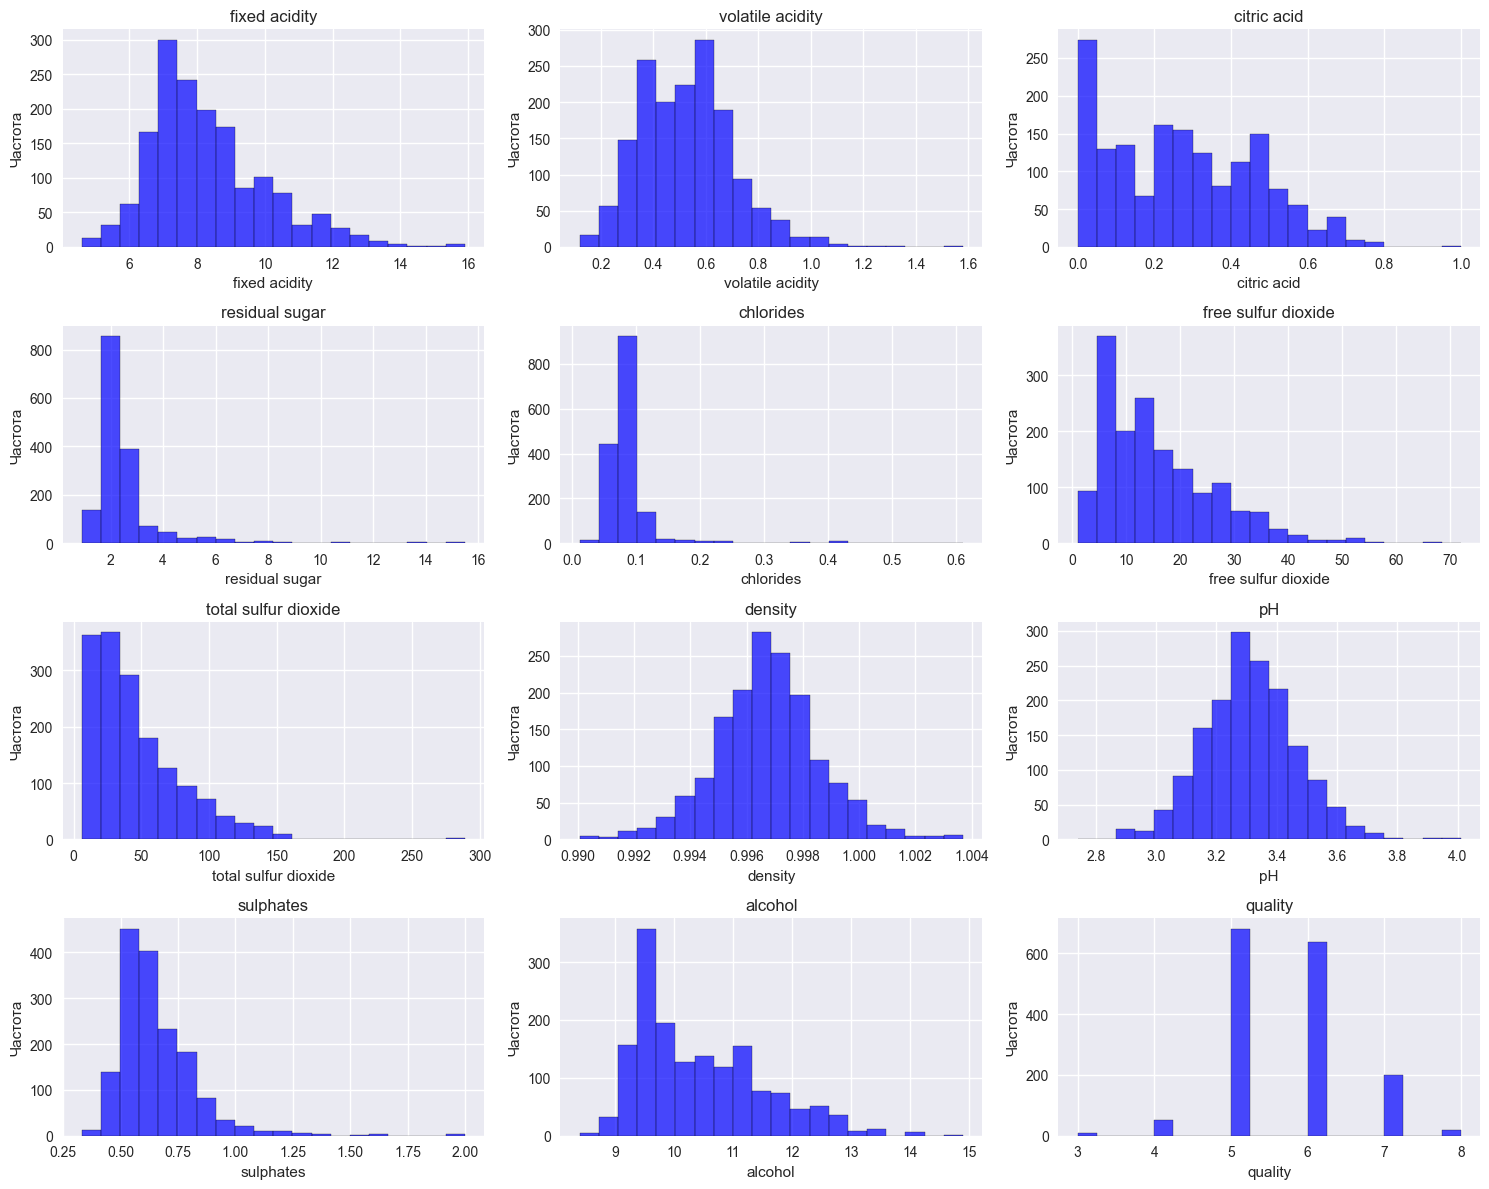

In [9]:
print("=== ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ ===")

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    if i < 12:
        axes[i].hist(df[column], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(f'{column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [10]:
print("=== АНАЛИЗ ВЫБРОСОВ ===")

for column in df.columns:
    if column != 'quality':
        # Метод IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"{column}: {len(outliers)} выбросов")

=== АНАЛИЗ ВЫБРОСОВ ===
fixed acidity: 49 выбросов
volatile acidity: 19 выбросов
citric acid: 1 выбросов
residual sugar: 155 выбросов
chlorides: 112 выбросов
free sulfur dioxide: 30 выбросов
total sulfur dioxide: 55 выбросов
density: 45 выбросов
pH: 35 выбросов
sulphates: 59 выбросов
alcohol: 13 выбросов


=== ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ (BOXPLOT) ===


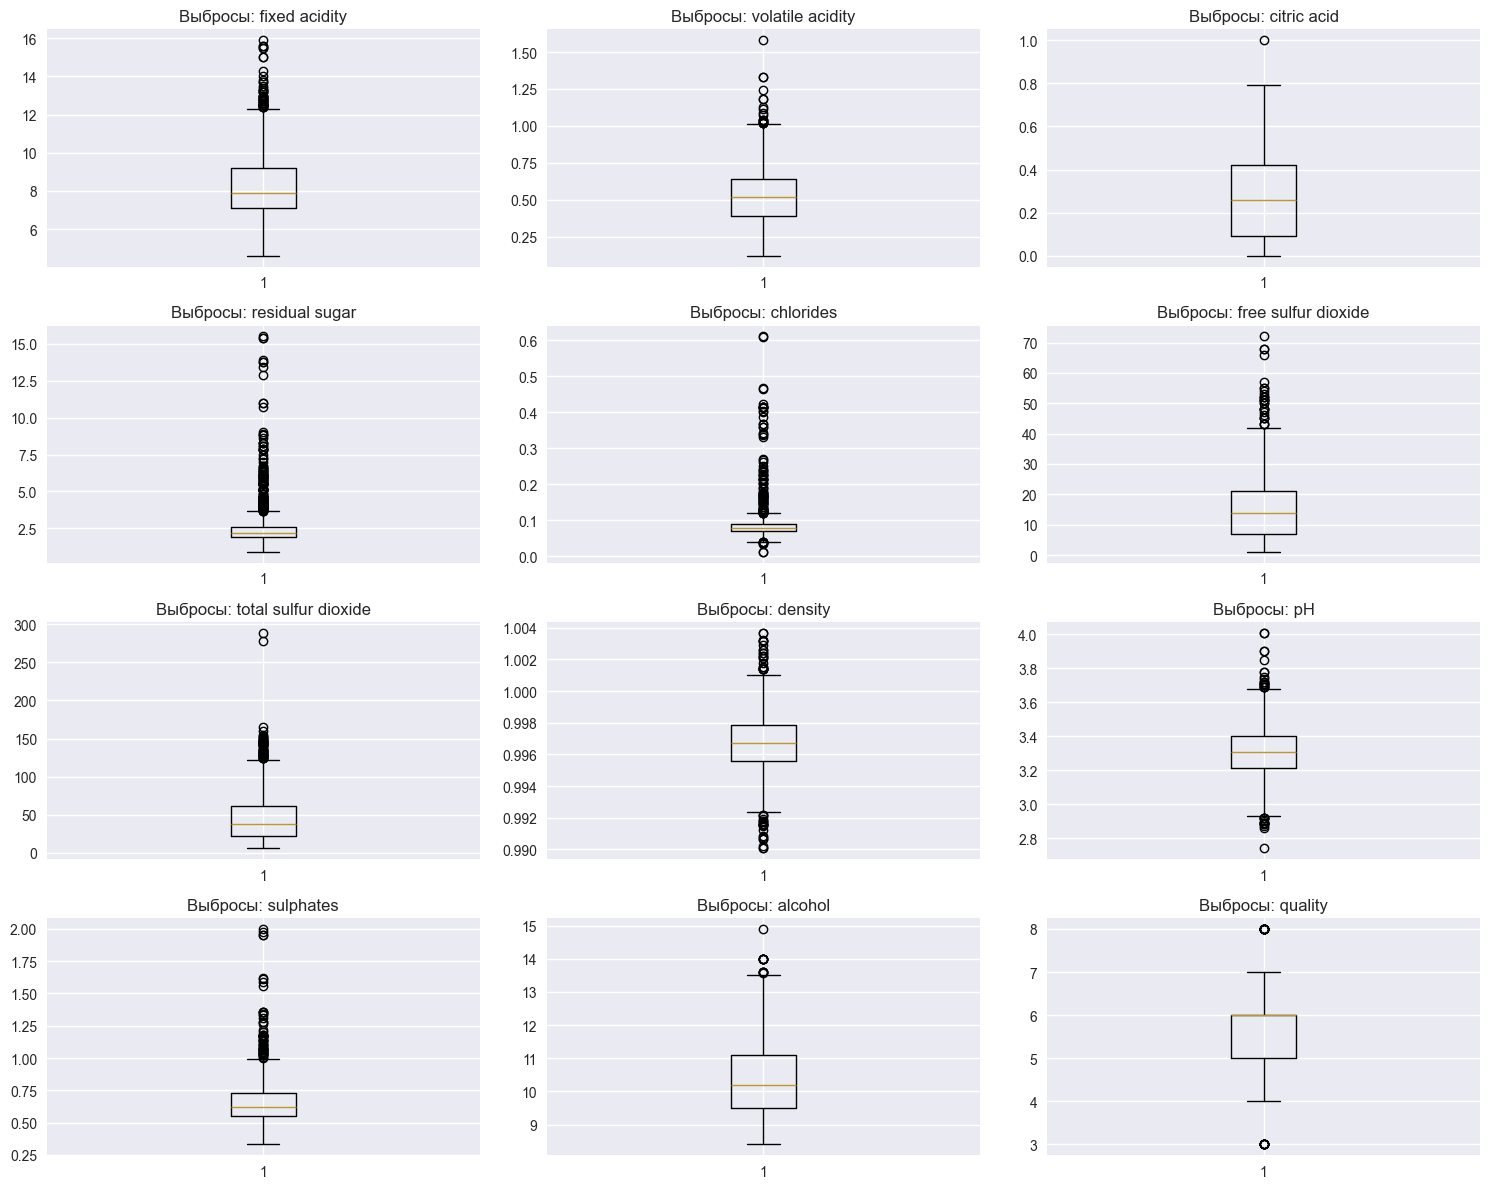

In [11]:
print("=== ВИЗУАЛИЗАЦИЯ ВЫБРОСОВ (BOXPLOT) ===")

fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, column in enumerate(df.columns):
    if i < 12:
        axes[i].boxplot(df[column])
        axes[i].set_title(f'Выбросы: {column}')

plt.tight_layout()
plt.show()

=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===


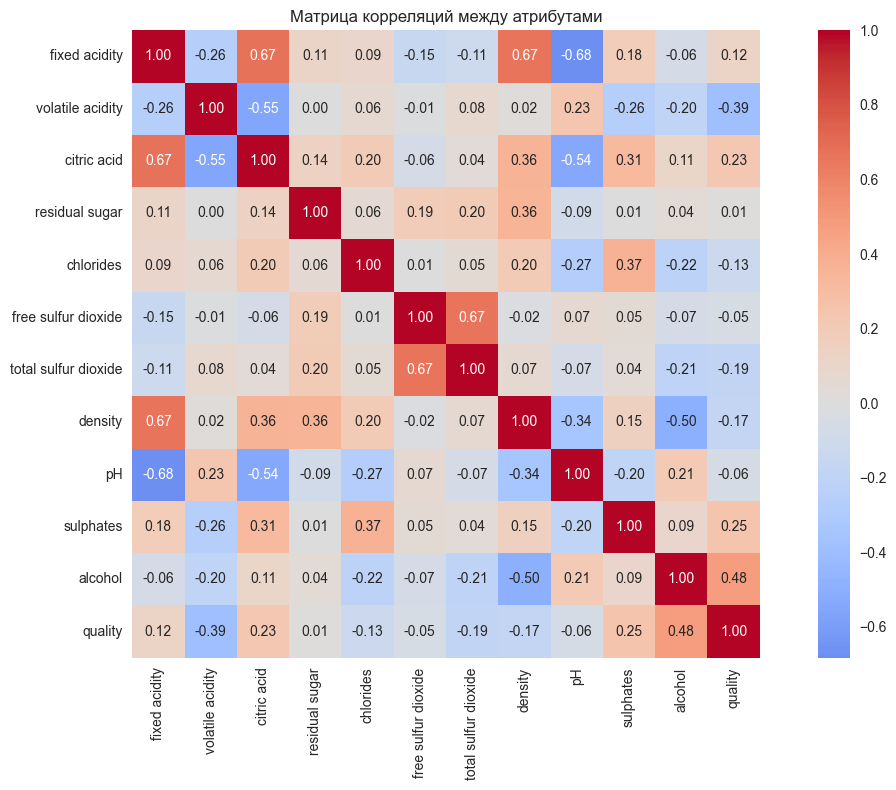

In [12]:
print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Матрица корреляций между атрибутами')
plt.tight_layout()
plt.show()

In [13]:
print("=== АНАЛИЗ КОРРЕЛЯЦИЙ ===")

quality_corr = correlation_matrix['quality'].sort_values(ascending=False)
print("Корреляция с качеством вина:")
for idx, value in quality_corr.items():
    print(f"{idx}: {value:.3f}")

print("\nВысококоррелированные пары (|r| > 0.5):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")

=== АНАЛИЗ КОРРЕЛЯЦИЙ ===
Корреляция с качеством вина:
quality: 1.000
alcohol: 0.476
sulphates: 0.251
citric acid: 0.226
fixed acidity: 0.124
residual sugar: 0.014
free sulfur dioxide: -0.051
pH: -0.058
chlorides: -0.129
density: -0.175
total sulfur dioxide: -0.185
volatile acidity: -0.391

Высококоррелированные пары (|r| > 0.5):
fixed acidity - citric acid: 0.672
fixed acidity - density: 0.668
fixed acidity - pH: -0.683
volatile acidity - citric acid: -0.552
citric acid - pH: -0.542
free sulfur dioxide - total sulfur dioxide: 0.668


=== МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ ===


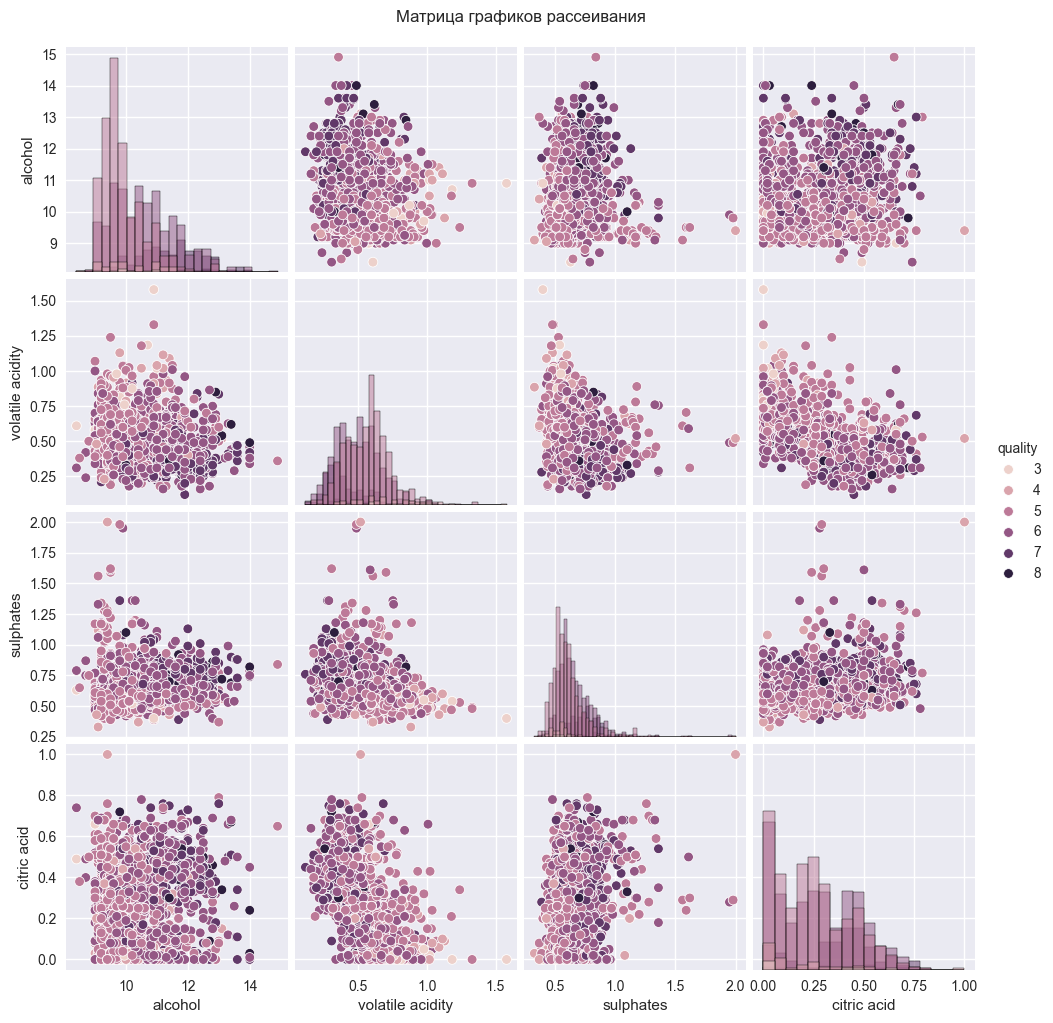

In [14]:
print("=== МАТРИЦА ГРАФИКОВ РАССЕИВАНИЯ ===")

selected_columns = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
sns.pairplot(df[selected_columns], diag_kind='hist', hue='quality')
plt.suptitle('Матрица графиков рассеивания', y=1.02)
plt.show()

## Выводы по анализу

### 1. Качество данных:
- Пропущенных значений не обнаружено
- Данные готовы к дальнейшему анализу

### 2. Статистические характеристики:
- Обнаружены выбросы в нескольких атрибутах

### 3. Корреляционный анализ:
- Наибольшая положительная корреляция с качеством: alcohol (0.48)
- Наибольшая отрицательная корреляция: volatile acidity (-0.39)
- Обнаружены сильные корреляции между химическими показателями

### 4. Рекомендации для дальнейшего анализа:
- Обработать выбросы
- Использовать alcohol, volatile acidity, sulphates как наиболее значимые признаки